# Nonparametric methods
Nonparametric methods are not based on the assumption that the values are samples from a Gaussian distribution. These methods work by ignoring the actual data values and instead analyzing only their **ranks**, from low to high values.  
This approach ensures that the test isn't affected much by outliers.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as ss

## Comparing 2 unpaired groups: Mann-Whitney/Wilcoxon rank-sum test
The data come from Chapter 30. Two values tie for ranks 4 and 5, so both are assigned a rank of 4.5

In [55]:
old_rank = np.array([3, 1, 11, 6, 4.5, 8, 4.5, 12, 2])
young_rank=np.array([10, 13, 14, 16, 15, 17, 9, 7])

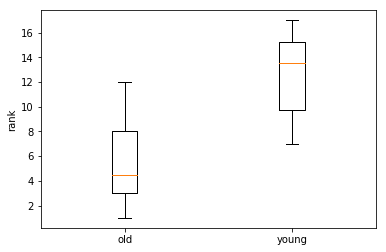

In [9]:
plt.boxplot([old_rank, young_rank])
plt.xticks([1,2], ['old', 'young'])
plt.ylabel('rank');

### Method
1. Rank the values;
2. Sum the ranks in each group;
3. Calculate the mean rank of each group;  
If the means of the ranks in the two groups are very different, the P value will be small.
4. Compute a P value for the null hypothesis that the distribution of ranks is totally random.
If there are ties, different programs might calculate a different P value.  
The null hypothesis is that the distributions of both groups are identical, so that there is a 50% probability that an observation from a value randomly selected from one population exceeds an observation randomly selected from the other population.

In [10]:
sum_group_old = np.sum(old_rank)
sum_group_young=np.sum(young_rank)
print(sum_group_old, sum_group_young)

52.0 101


In [44]:
mean_group_old = np.mean(old_rank)
mean_group_young=np.mean(young_rank)
print(mean_group_old, mean_group_young)

5.777777777777778 12.625


### Starting from raw data

In [48]:
old = np.array([20.8, 2.8, 50, 33.3, 29.4, 38.9, 29.4, 52.6, 14.3])
young=np.array([45.5, 55, 60.7, 61.5, 61.1, 65.5, 42.9, 37.5])

In [54]:
ss.rankdata(np.concatenate([old, young]))

array([ 3. ,  1. , 11. ,  6. ,  4.5,  8. ,  4.5, 12. ,  2. , 10. , 13. ,
       14. , 16. , 15. , 17. ,  9. ,  7. ])

In [49]:
ss.ranksums(old, young)

RanksumsResult(statistic=-2.790526301083191, pvalue=0.0052622424628052285)

This test should be used to compare two samples from continuous distributions. It does not handle ties between measurements in x and y. For tie-handling and an optional continuity correction see scipy.stats.mannwhitneyu

In [66]:
ss.mannwhitneyu(old, young)

MannwhitneyuResult(statistic=7.0, pvalue=0.0030338920618032113)

## Comparing 2 paired groups: Wilcoxon matched-pairs signed-rank test
It tests the null hypothesis that there is no difference in the population and so the differences between matched pairs will be randomly positive or negative.

### Method
1. Calculate the difference between each matched pair, keeping track of the sign (decrease = negative);
2. Rank the _absolute_ value of the differences, temporarily ignoring the sign;
3. Add up the ranks of all positive differences and the ranks of all the negative differences;
4. Compute the difference between those two sums;
5. Compute a P value: if the H$_0$ were true, what would be the chance of randomly choosing samples such that the sums of the absolute values of the positive and negative ranks would differ by X or more?

### Example from chapter 31

In [56]:
cross = np.array([23.5, 12, 21, 22, 19.125, 21.5, 22.125, 20.375,
                 18.250, 21.625, 23.250, 21, 22.125, 23, 12])
self =  np.array([17.375, 20.375, 20, 20, 18.375, 18.625, 18.625, 15.25,
                 16.5, 18, 16.25, 18, 12.75, 15.5, 18])

In [57]:
diff = cross - self

In [58]:
diff

array([ 6.125, -8.375,  1.   ,  2.   ,  0.75 ,  2.875,  3.5  ,  5.125,
        1.75 ,  3.625,  7.   ,  3.   ,  9.375,  7.5  , -6.   ])

In [60]:
rank = ss.rankdata(np.absolute(diff))
rank

array([11., 14.,  2.,  4.,  1.,  5.,  7.,  9.,  3.,  8., 12.,  6., 15.,
       13., 10.])

In [61]:
sum_rank_pos = np.sum(rank[diff > 0])
sum_rank_neg = np.sum(rank[diff < 0])
sum_rank_pos, sum_rank_neg

(96.0, 24.0)

In [64]:
sum_rank_pos - sum_rank_neg

72.0

In [63]:
ss.wilcoxon(cross, self)

WilcoxonResult(statistic=24.0, pvalue=0.04088813291185591)

## Nonparamtric correlation - Spearman's rank correlation
It separately ranks the X and Y values and then computes the correlation between the two sets of ranks. Pearson correlation quantifies the _linear_ relationship between X and Y, while Spearman quantifies the _monotonic_ relationship between X and Y.

### Example from chapter 32

In [67]:
insulin_sensitiv = np.array([250, 220, 145, 115, 230, 200, 330, 400, 370, 260, 270, 530, 375])
C2022_fatacids = np.array([17.9, 18.3, 18.3, 18.4, 18.4, 20.2, 20.3, 21.8, 21.9, 22.1, 23.1, 24.2, 24.4])

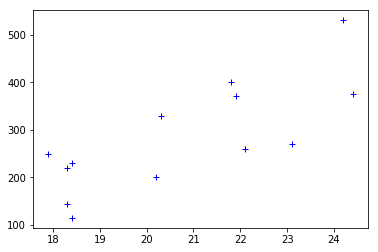

In [71]:
plt.plot(C2022_fatacids, insulin_sensitiv, 'b+', linestyle='none');

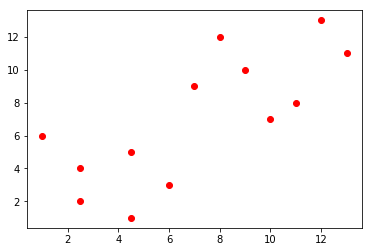

In [72]:
X_rank = ss.rankdata(C2022_fatacids)
Y_rank = ss.rankdata(insulin_sensitiv)
plt.plot(X_rank, Y_rank, 'ro', linestyle='none')

In [82]:
r_s = np.corrcoef(X_rank, Y_rank)[0,1]
print(f"the nonparametric correlation coefficient rs is {r_s:}")

the nonparametric correlation coefficient rs is 0.7438044752782766


In [80]:
ss.spearmanr(C2022_fatacids, insulin_sensitiv)

SpearmanrResult(correlation=0.7438044752782768, pvalue=0.0035581937201355457)

The P value tests the H0 that there is no rank correlation in the overall population.

## Nonparametric ANOVA
See Kruskal-Wallis test (one-way ANOVA) and Friedman's test (repeated-measures one-way ANOVA). These tests first rank the data from low to high and then analyze the distribution of the ranks amoing groups.